###### Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pwd # To check current working directory

'D:\\Machine Learning Projects\\Bank Marketing Dataset\\notebooks'

In [4]:
df=pd.read_csv(r'D:\Machine Learning Projects\Bank Marketing Dataset\dataset\bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.shape

(11162, 17)

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [8]:
df.select_dtypes(['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
print('THIS IS THE NUMBER OF UNIQUE DATA PRESENT IN EACH COLUMN') 
for i in df.select_dtypes(['object']).columns:
    print(i,'----->',len(df[i].unique()))

THIS IS THE NUMBER OF UNIQUE DATA PRESENT IN EACH COLUMN
job -----> 12
marital -----> 3
education -----> 4
default -----> 2
housing -----> 2
loan -----> 2
contact -----> 3
month -----> 12
poutcome -----> 4
deposit -----> 2


In [11]:
print('THIS IS THE NUMBER OF UNIQUE DATA PRESENT IN Object COLUMN WITH EACH UNIQUE DATA COUNT') 
for i in df.select_dtypes(['object']).columns:
    print(df[i].value_counts())
    print("\n")

THIS IS THE NUMBER OF UNIQUE DATA PRESENT IN Object COLUMN WITH EACH UNIQUE DATA COUNT
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


no     10994
yes      168
Name: default, dtype: int64


no     5881
yes    5281
Name: housing, dtype: int64


no     9702
yes    1460
Name: loan, dtype: int64


cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


unknown    8326
failu

In [12]:
df.select_dtypes(['int64']).columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [13]:
df.select_dtypes(['int64']).describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


###### Age

1. Minimum age of customer is 18
2. Maximum age of customer is 95
3. Median age of customer is 39


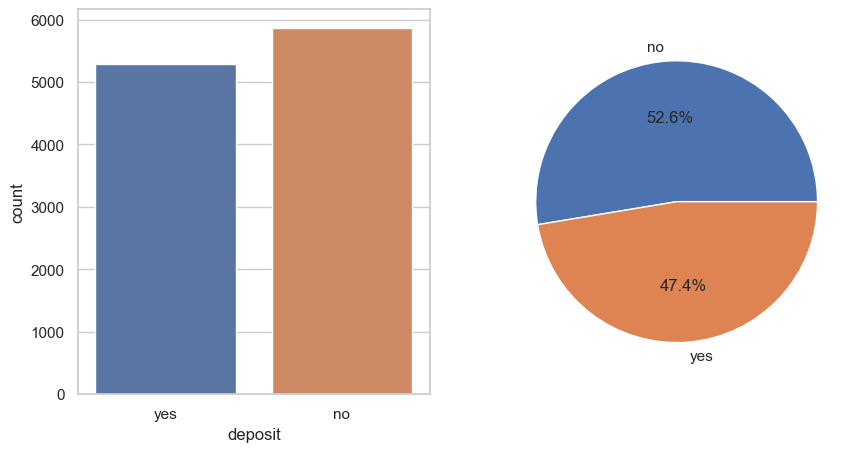

In [27]:
fig = plt.figure(figsize =(10, 5))
sns.set_theme(style="whitegrid")
plt.subplot(1,2,1)
sns.countplot(x=df["deposit"])
plt.subplot(1,2,2)
plt.pie(df['deposit'].value_counts(sort=True),labels=df['deposit'].value_counts().index,autopct='%1.1f%%')
plt.show()

Dataset is balanced as number of target value i.e yes/no are in equal proportion

In [31]:
categorical_df=df.select_dtypes(['object']).columns.drop(["deposit","job"])

In [32]:
categorical_df

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

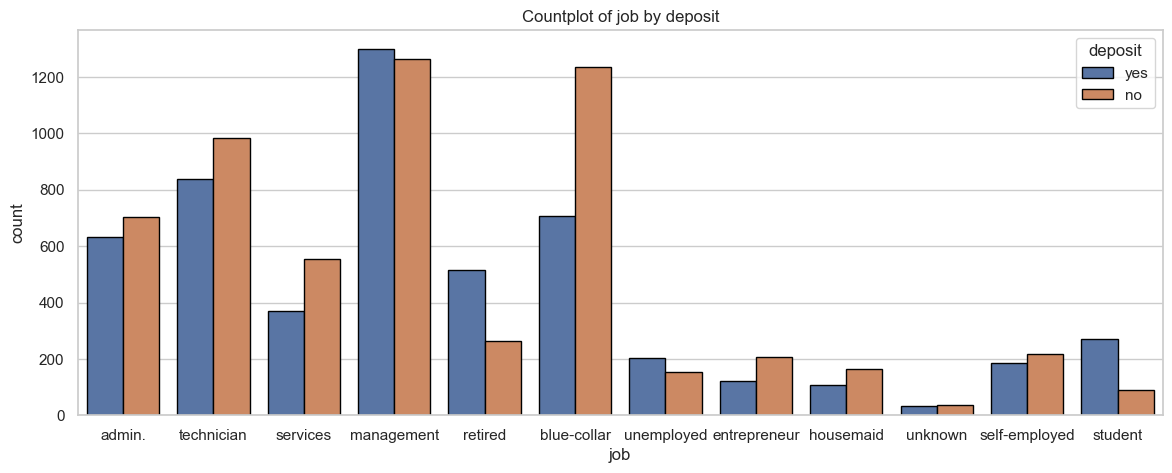

In [35]:
plt.figure(figsize=[14,5])
sns.countplot(x='job', hue='deposit',edgecolor="black",data=df)
plt.title("Countplot of job by deposit")
plt.show()

> The number of people doing management job are more and term deposit taken by them are the highest although they are the one's which are rejecting the term deposit the most.

>Students and retired person are more likely to subscribe for the term deposit

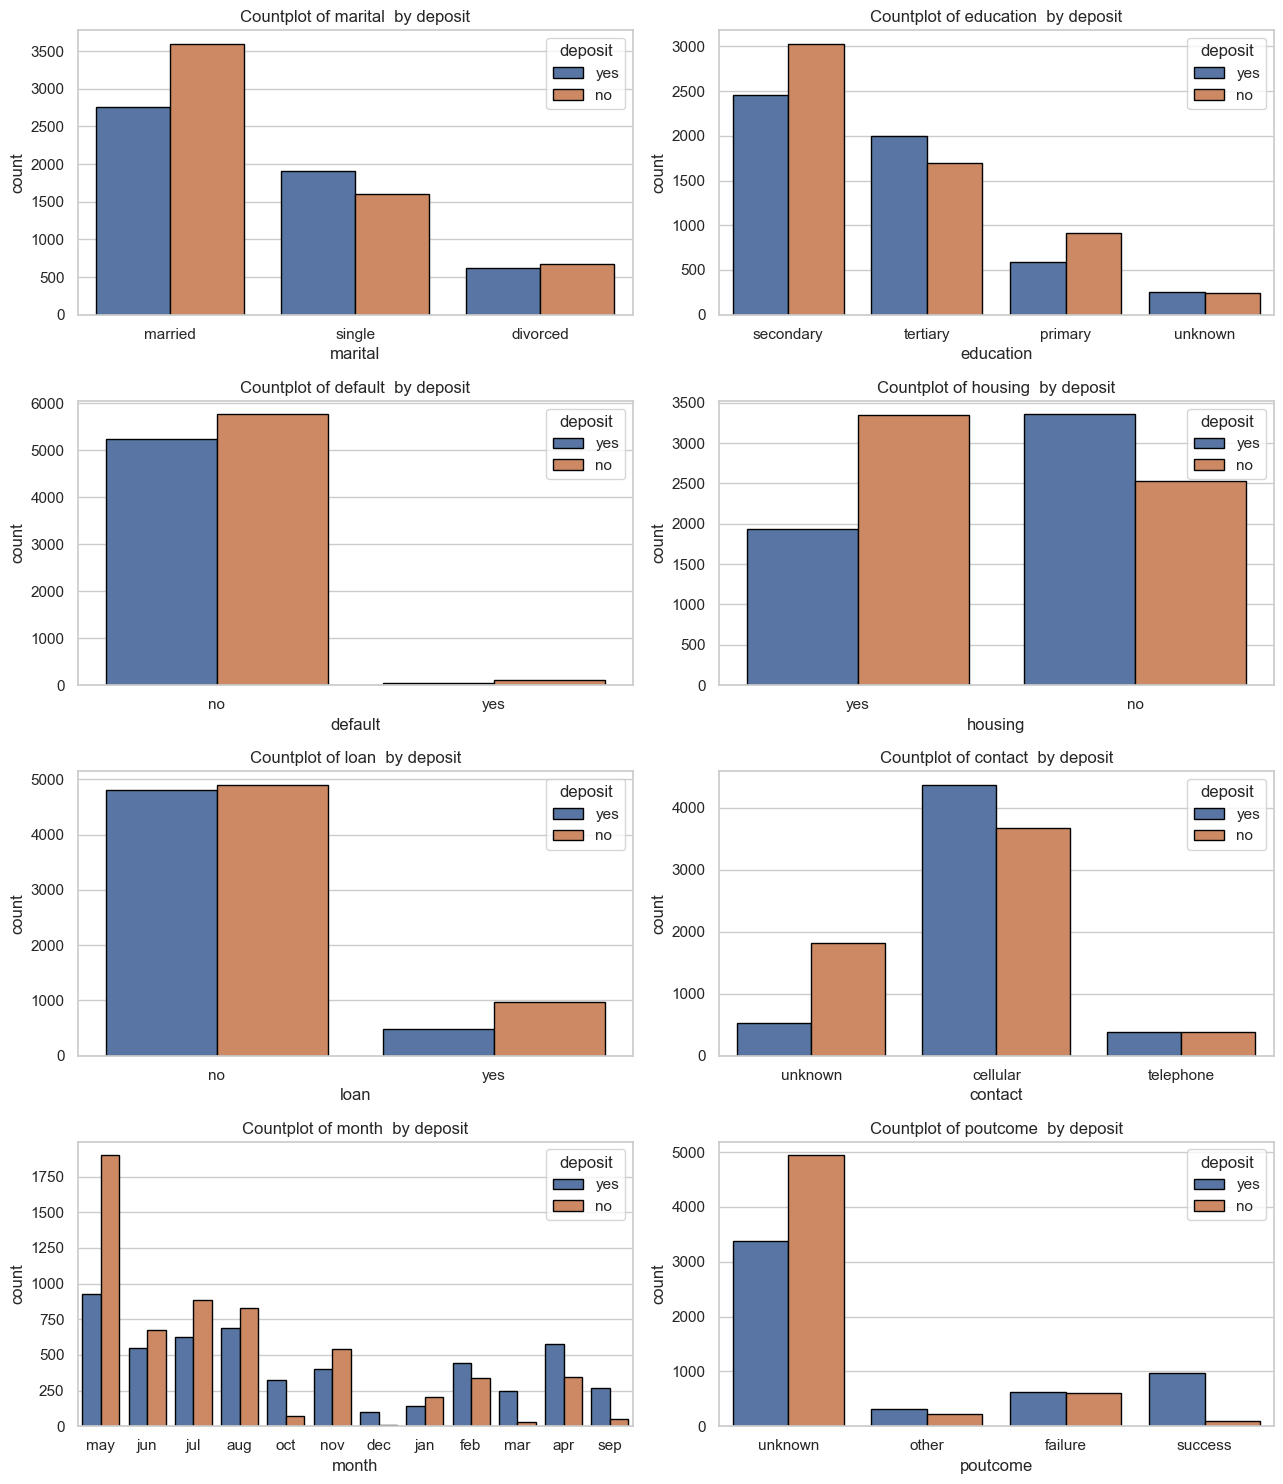

In [34]:
plt.figure(figsize=(13,15))
for i,categorical_features in enumerate(categorical_df):
    plt.subplot(4,2,i+1)
    sns.countplot(x=categorical_features,hue='deposit',data=df,edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(categorical_features))
plt.tight_layout()    
plt.show()

> Single person are more likely to subscribe for term deposit as compared to married person

> The person having housing loan are unlikely subscribe for term deposit

> People who are contacted using cellular are more likely to take term deposit

>The number of people subscribing for the term deposit is highest in may month whereas lowest in december month

In [36]:
numerical_df=df.select_dtypes(['int64']).columns
numerical_df

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

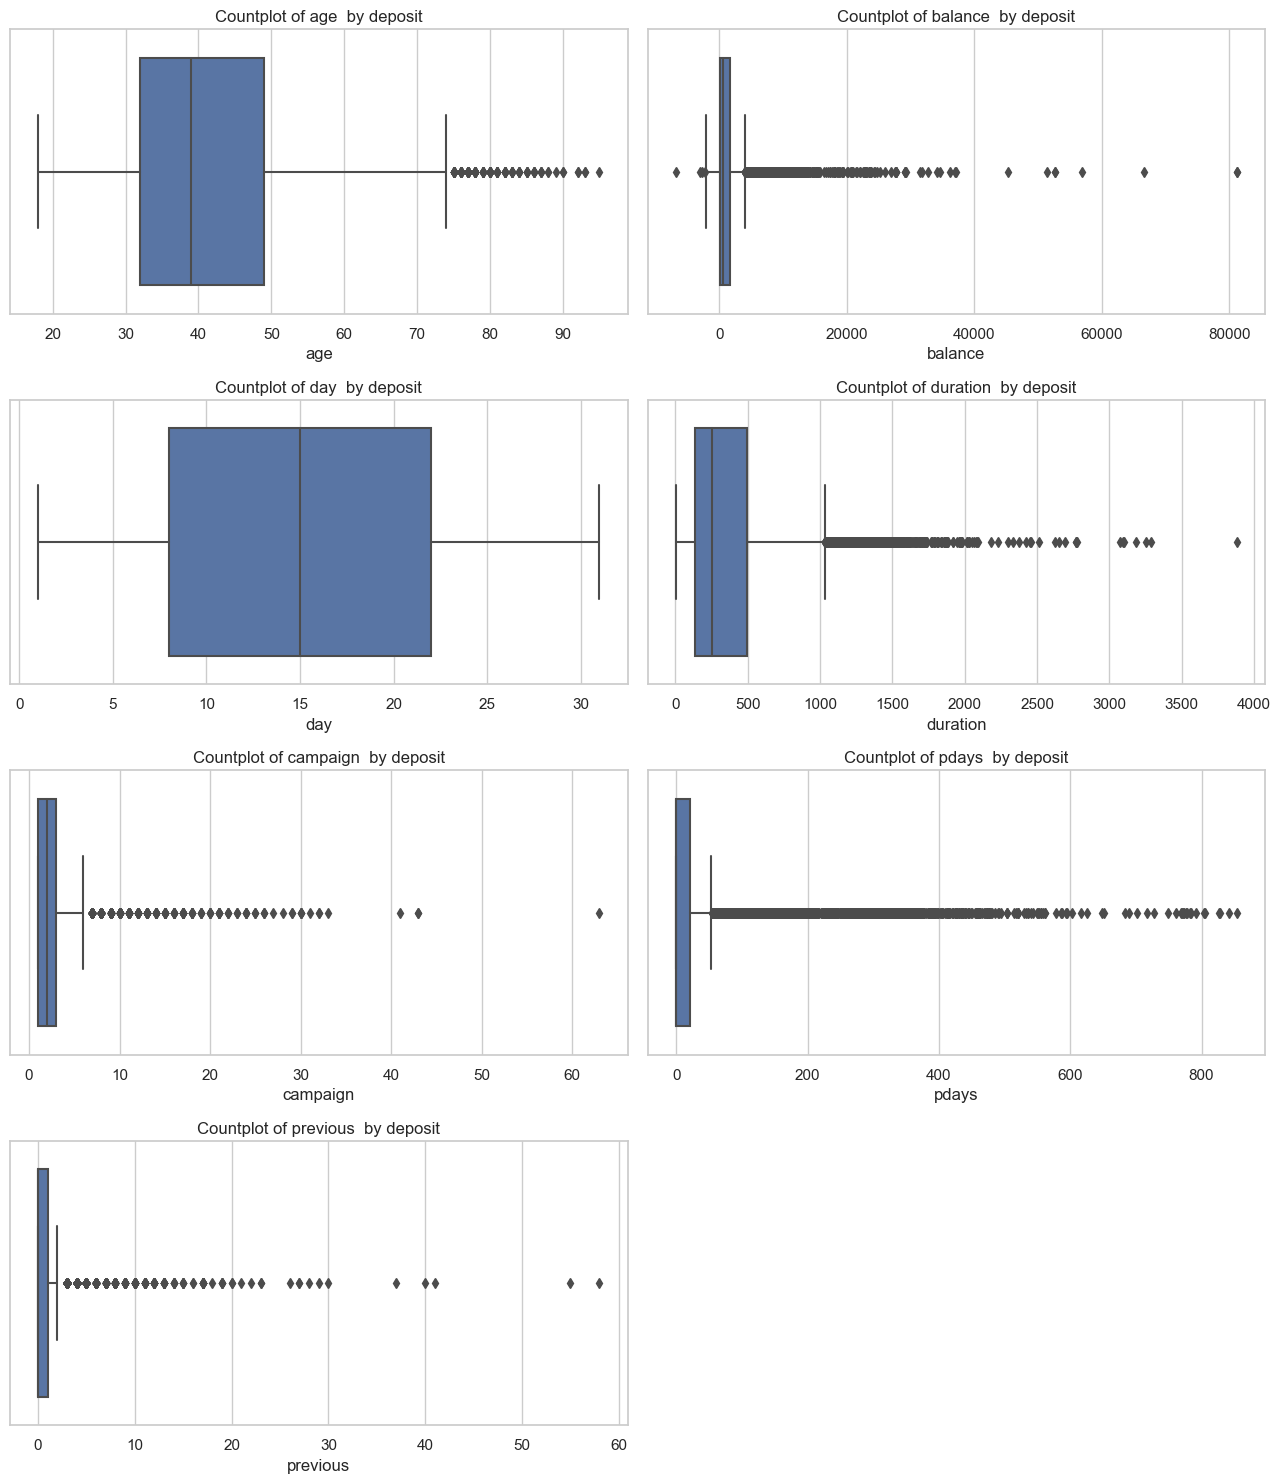

In [38]:
plt.figure(figsize=(13,15))
for i,numerical_features in enumerate(numerical_df):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=numerical_features,hue='deposit',data=df)
    plt.title("Countplot of {}  by deposit".format(numerical_features))
plt.tight_layout()    
plt.show()